<p style="background-color:lightgreen;font-family:newtimeroman;font-size:22px;line-height:1.7em;text-align:center;border-radius:5px 5px">House Sales Prediction of King Country-USA</p>

### About Dataset

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

#### VARIABLES

id - Unique ID for each home sold

date - Date of the home sale

price - Price of each home sold

bedrooms - Number of bedrooms

bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower

sqft_living - Square footage of the apartments interior living space

sqft_lot - Square footage of the land space

floors - Number of floors

waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not

view - An index from 0 to 4 of how good the view of the property was

condition - An index from 1 to 5 on the condition of the apartment,

grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

sqft_above - The square footage of the interior housing space that is above ground level

sqft_basement - The square footage of the interior housing space that is below ground level

yr_built - The year the house was initially built

yr_renovated - The year of the house’s last renovation

zipcode - What zipcode area the house is in

lat - Lattitude

long - Longitude

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors.

#### Data and Variable nformation Reference : 

https://geodacenter.github.io/data-and-lab/KingCounty-HouseSales2015/ 

https://rstudio-pubs-static.s3.amazonaws.com/155304_cc51f448116744069664b35e7762999f.html

In [8]:
# IMporting Required Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors as mcolors
import warnings
warnings.filterwarnings("ignore")

In [9]:
ls

 Linear Regression  for Advertising dataset/
Automatic Filling Missing Values Based on Outliers.pdf
FetalHealth/
FuelConsumption/
Fuel_Consumption/
HeartDisease/
House Sales Prediction of King Country-USA.ipynb
LoanPrediction/
Simple Linear Regression ___AdiposeTissue/
kc_house.csv
pandas_profiling.ipynb
train.csv
wcat.csv.webloc


In [10]:
data = pd.read_csv("kc_house.csv")
data 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3421079032,20150217T000000,75000.0,1,0.00,670,43377,1.0,0,0,...,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
1,40000362,20140506T000000,78000.0,2,1.00,780,16344,1.0,0,0,...,5,780,0,1942,0,98168,47.4739,-122.280,1700,10387
2,8658300340,20140523T000000,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
3,3028200080,20150324T000000,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
4,3883800011,20141105T000000,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
21609,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
21610,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
21611,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449


In [11]:
#data = pd.read_csv(r"C://PYTHON//AI_ML//Deep_Learning//kc_house.csv")
#data

### EXPLORATORY DATA ANALYSIS

In [12]:
# Getting the Data Shape
data.shape

(21613, 21)

In [13]:
# Getting the Meta data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [14]:
# Checking for Duplicates
data.duplicated().sum()

0

In [15]:
# Checking For Null Values
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [16]:
# Let's Describe the stats of the Data
data.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4580301520.86,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2876565571.31,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049194.00,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900445.00,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


In [17]:
# Binning target variable
data['price_binned'] = pd.cut(np.round(data['price'], 1), bins=[0, 250000, 500000, 1000000, 2000000, 8000000],\
                              labels=['Low (0-250k)', 'Moderate (250k-500k)', 'High (500k-1m)', 'Very High (1m-2m)', 'Extremely High (2m+)'])
price_binned_data = data.groupby('price_binned').count()['id'].reset_index(name='count')
price_binned_data.sort_values('count', ascending=True)

,price_binned,count
4,Extremely High (2m+),198
3,Very High (1m-2m),1267
0,Low (0-250k),2433
2,High (500k-1m),7588
1,Moderate (250k-500k),10127


In [18]:
print("House Prices (Categorical) proportion\n")
price_binned_data['percentage'] = np.round(100*(price_binned_data['count']/price_binned_data['count'].sum()), 1)
print(price_binned_data.to_markdown())

House Prices (Categorical) proportion



ImportError: Missing optional dependency 'tabulate'.  Use pip or conda to install tabulate.

___Delete Unwanted Coloumns___

- Some times some attributes from dataframe are not usefull at all to analyse data. For example "id" column in dataframe not usefull to estimate price of the house in our dataframe. So, i want to delete this type of columns from dataframe, those are : 'id', 'date', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long'

In [19]:
data = data.drop(['id', 'date', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long','price_binned'], axis=1)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,75000.0,1,0.00,670,43377,1.0,0,0,3,3,670,0,1160,42882
1,78000.0,2,1.00,780,16344,1.0,0,0,1,5,780,0,1700,10387
2,80000.0,1,0.75,430,5050,1.0,0,0,2,4,430,0,1200,7500
3,81000.0,2,1.00,730,9975,1.0,0,0,1,5,730,0,860,9000
4,82000.0,3,1.00,860,10426,1.0,0,0,3,6,860,0,1140,11250


___Value Counts On Variables___

In [20]:
bed = data.bedrooms.value_counts()
bed

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [21]:
data[['bedrooms','price','condition']].groupby(['bedrooms','condition']).agg(['mean','count'])

price      
                            mean count
bedrooms condition                    
0        1          1.420000e+05     1
         2          2.280000e+05     1
         3          4.813600e+05    10
         4          1.399500e+05     1
1        1          2.855000e+05     4
         2          2.450000e+05    11
         3          3.135745e+05   124
         4          3.480948e+05    48
         5          3.151792e+05    12
2        1          2.772917e+05    12
         2          2.759067e+05    51
         3          4.012794e+05  1779
         4          4.059846e+05   718
         5          4.250840e+05   200
3        1          4.007438e+05     8
         2          2.963365e+05    69
         3          4.671847e+05  6308
         4          4.543136e+05  2711
         5          5.191837e+05   728
4        1          4.457500e+05     4
         2          4.733883e+05    36
         3          6.335218e+05  4580
         4          6.159941e+05  1682
         5          7.181036e+05   580
5        2          2.355000e+05     1
         3          8.130543e+05  1031
         4          7.080780e+05   418
         5          8.269887e+05   151
6        1          4.325000e+05     1
         2          5.248167e+05     3
         3          7.866955e+05   158
         4          8.747552e+05    87
         5          9.623078e+05    23
7        3          9.179944e+05    25
         4          8.505730e+05     9
         5          1.385000e+06     4
8        3          7.920000e+05     8
         4          9.200000e+05     3
         5          2.635000e+06     2
9        3          8.939998e+05     6
10       3          1.148000e+06     1
         4          6.550000e+05     2
11       3          5.200000e+05     1
33       5          6.400000e+05     1

In [22]:
# To Know the categories of feature "condition"
con = data.condition.value_counts()
con

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

- condition: - An index from 1 to 5 on the condition of the apartment.

In [23]:
# To Know the categories of feature "floors"
fl = data.floors.value_counts()
fl

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

In [24]:
# To Know the categories of feature "grade"
fl = data.grade.value_counts()
fl

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

- grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

In [25]:
# Getting value counts on bath rooms
bath = data.bathrooms.value_counts()
bath

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
5.50      10
0.00      10
1.25       9
6.00       6
5.75       4
0.50       4
6.75       2
6.50       2
8.00       2
6.25       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

- bathrooms: - count of bathrooms with rank , where .5 accounts for a room with a toilet but no shower

In [26]:
# Getting value counts on view
view = data.view.value_counts()
view

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

- view: - An index from 0 to 4 of how good the view of the property was

___Visual Analysis___

Text(0.5, 0.98, 'Target Distribution')

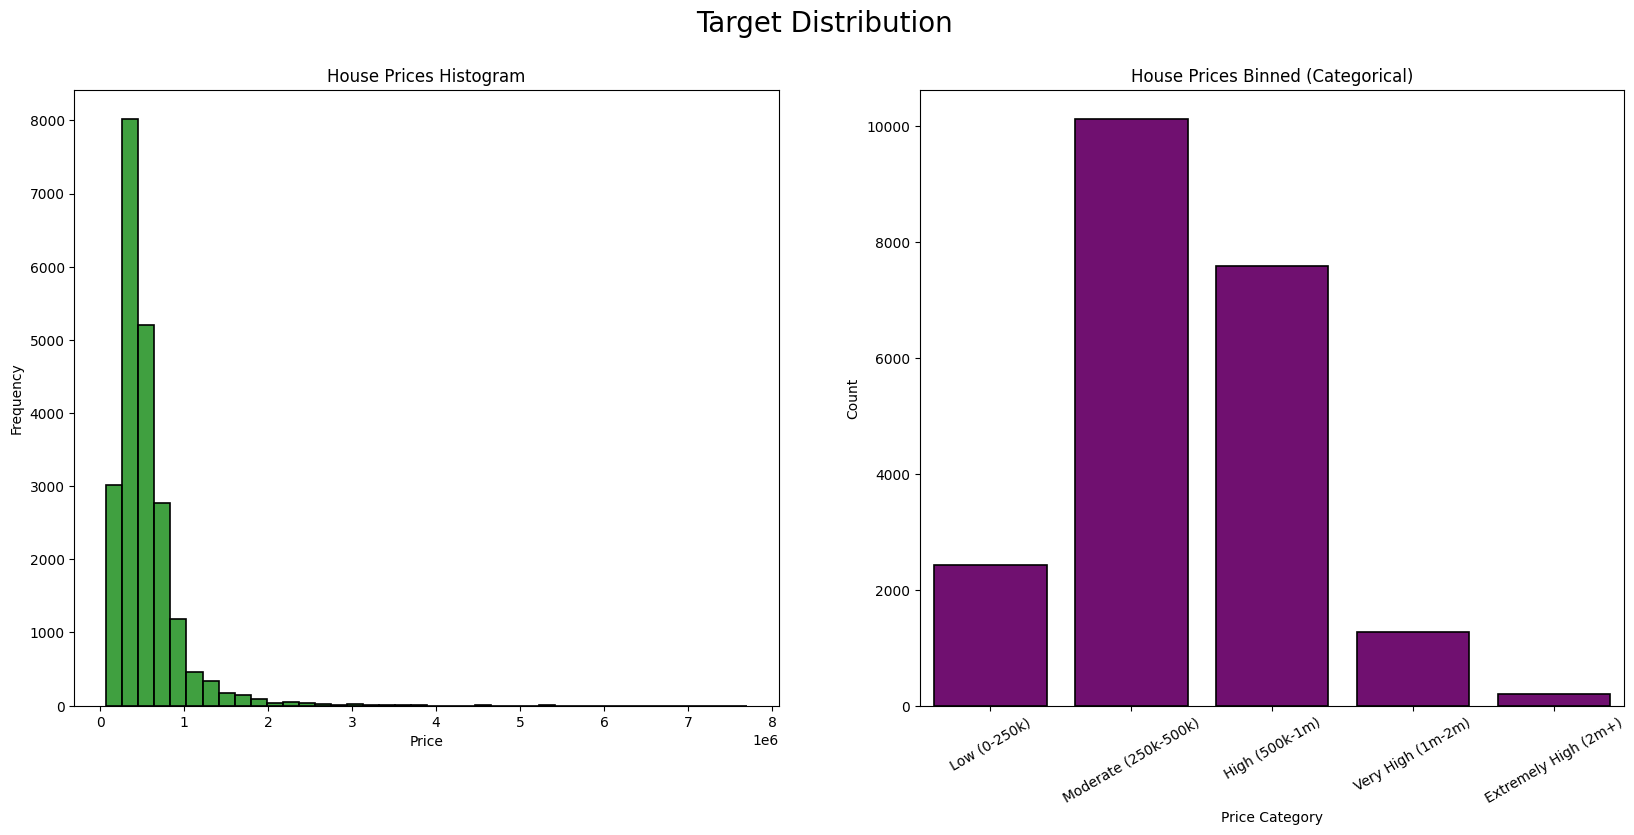

In [27]:
# Plotting code
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.histplot(data['price'], color='green', edgecolor='black', linewidth=1.2, bins=40, ax=ax[0])
ax[0].set_title("House Prices Histogram")
ax[0].set_xlabel("Price")
ax[0].set_ylabel("Frequency")
sns.barplot(x=price_binned_data['price_binned'], y=price_binned_data['count'], edgecolor='black', linewidth=1.2, \
            color='purple', orient="v", ax=ax[1])
ax[1].set_ylabel("Count")
ax[1].set_xlabel("Price Category")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 30)
ax[1].set_title("House Prices Binned (Categorical)")
fig.suptitle('Target Distribution', fontsize=20)

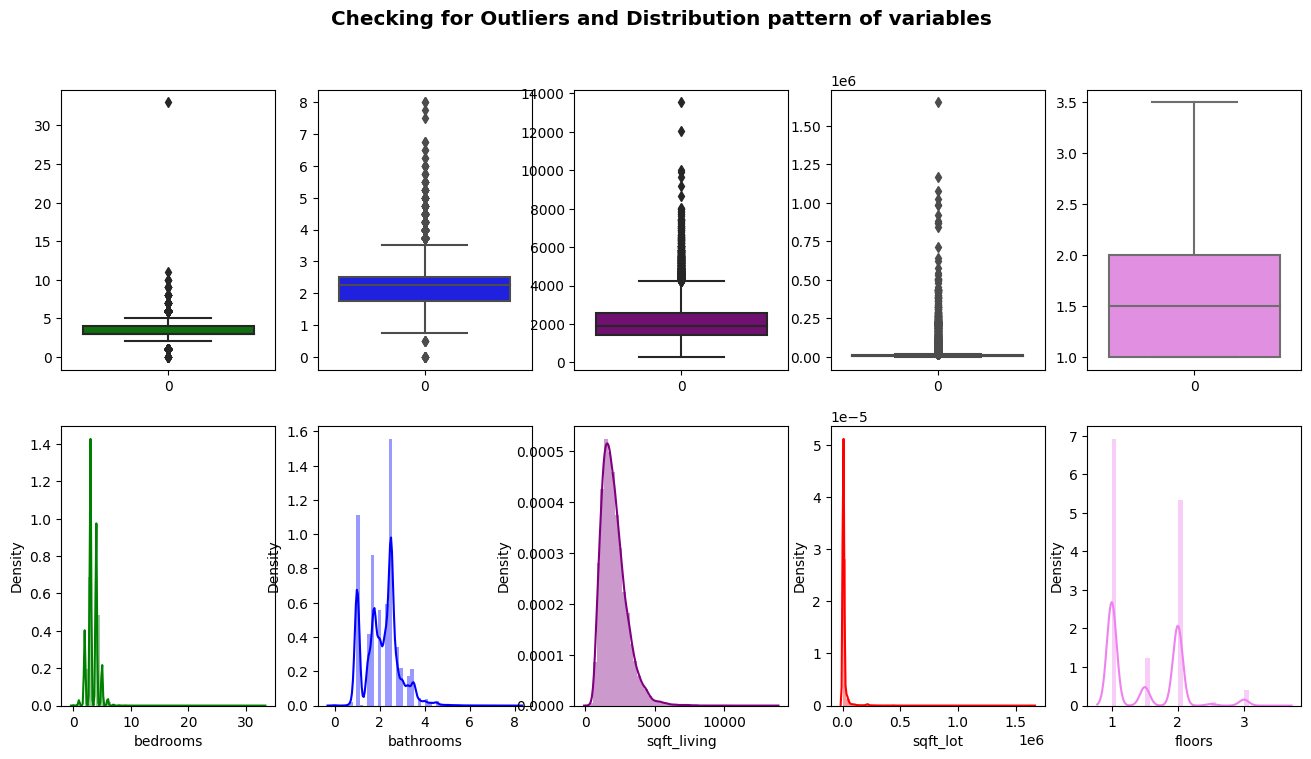

In [28]:
plt.figure(figsize = (16,8))
plt.suptitle("Checking for Outliers and Distribution pattern of variables", fontsize = 'x-large',weight = 'extra bold',ha = "center")
plt.subplot(2,5,1)
sns.boxplot(data['bedrooms'], color = 'green')
plt.subplot(2,5,2)
sns.boxplot(data['bathrooms'], color = 'blue')
plt.subplot(2,5,3)
sns.boxplot(data['sqft_living'], color = 'purple')
plt.subplot(2,5,4)
sns.boxplot(data['sqft_lot'], color = 'red')
plt.subplot(2,5,5)
sns.boxplot(data['floors'], color = 'violet')
plt.subplot(2,5,6)
sns.distplot(data['bedrooms'], color = 'green')
plt.subplot(2,5,7)
sns.distplot(data['bathrooms'], color = 'blue')
plt.subplot(2,5,8)
sns.distplot(data['sqft_living'], color = 'purple')
plt.subplot(2,5,9)
sns.distplot(data['sqft_lot'], color = 'red')
plt.subplot(2,5,10)
sns.distplot(data['floors'], color = 'violet')
plt.show()

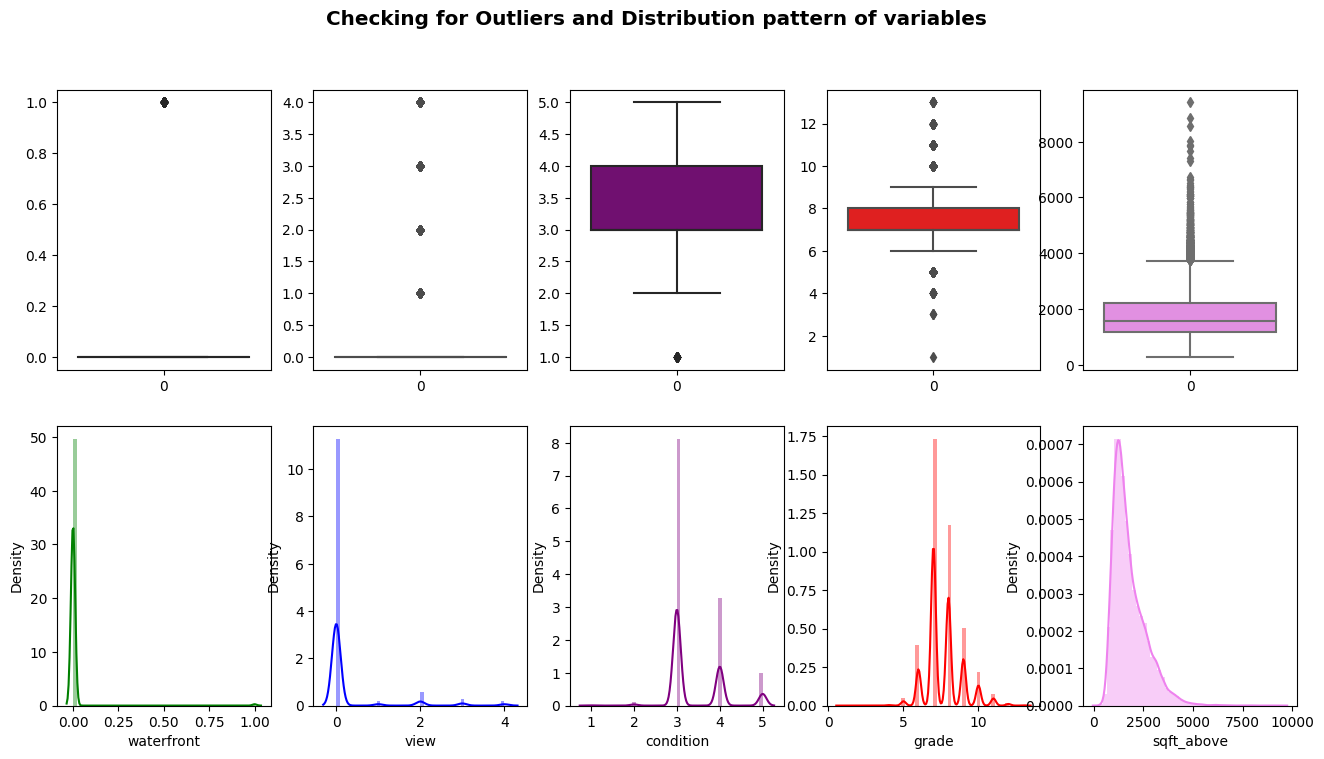

In [29]:
plt.figure(figsize = (16,8))
plt.suptitle("Checking for Outliers and Distribution pattern of variables", fontsize = 'x-large',weight = 'extra bold',ha = "center")
plt.subplot(2,5,1)
sns.boxplot(data['waterfront'], color = 'green')
plt.subplot(2,5,2)
sns.boxplot(data['view'], color = 'blue')
plt.subplot(2,5,3)
sns.boxplot(data['condition'], color = 'purple')
plt.subplot(2,5,4)
sns.boxplot(data['grade'], color = 'red')
plt.subplot(2,5,5)
sns.boxplot(data['sqft_above'], color = 'violet')
plt.subplot(2,5,6)
sns.distplot(data['waterfront'], color = 'green')
plt.subplot(2,5,7)
sns.distplot(data['view'], color = 'blue')
plt.subplot(2,5,8)
sns.distplot(data['condition'], color = 'purple')
plt.subplot(2,5,9)
sns.distplot(data['grade'], color = 'red')
plt.subplot(2,5,10)
sns.distplot(data['sqft_above'], color = 'violet')
plt.show()

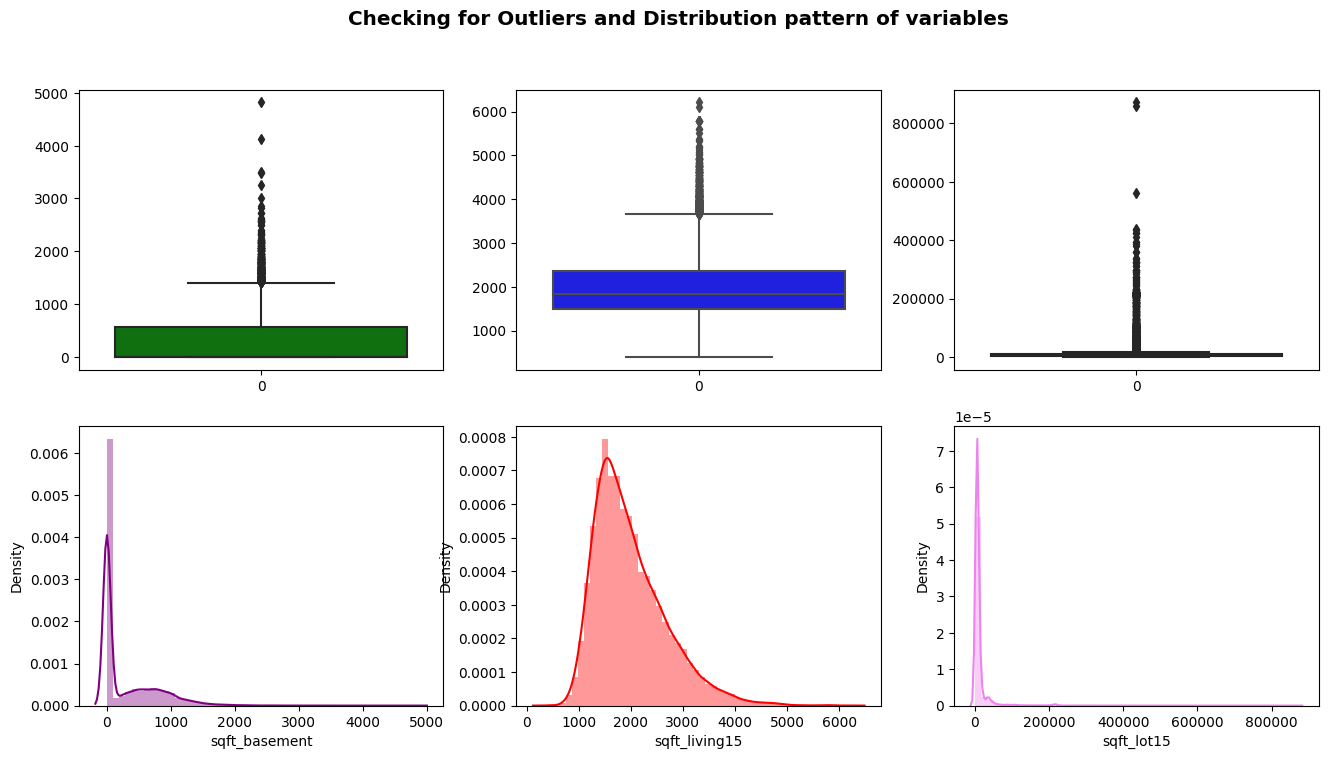

In [30]:
plt.figure(figsize = (16,8))
plt.suptitle("Checking for Outliers and Distribution pattern of variables", fontsize = 'x-large',weight = 'extra bold',ha = "center")
plt.subplot(2,3,1)
sns.boxplot(data['sqft_basement'], color = 'green')
plt.subplot(2,3,2)
sns.boxplot(data['sqft_living15'], color = 'blue')
plt.subplot(2,3,3)
sns.boxplot(data['sqft_lot15'], color = 'purple')
plt.subplot(2,3,4)
sns.distplot(data['sqft_basement'], color = 'purple')
plt.subplot(2,3,5)
sns.distplot(data['sqft_living15'], color = 'red')
plt.subplot(2,3,6)
sns.distplot(data['sqft_lot15'], color = 'violet')
plt.show()

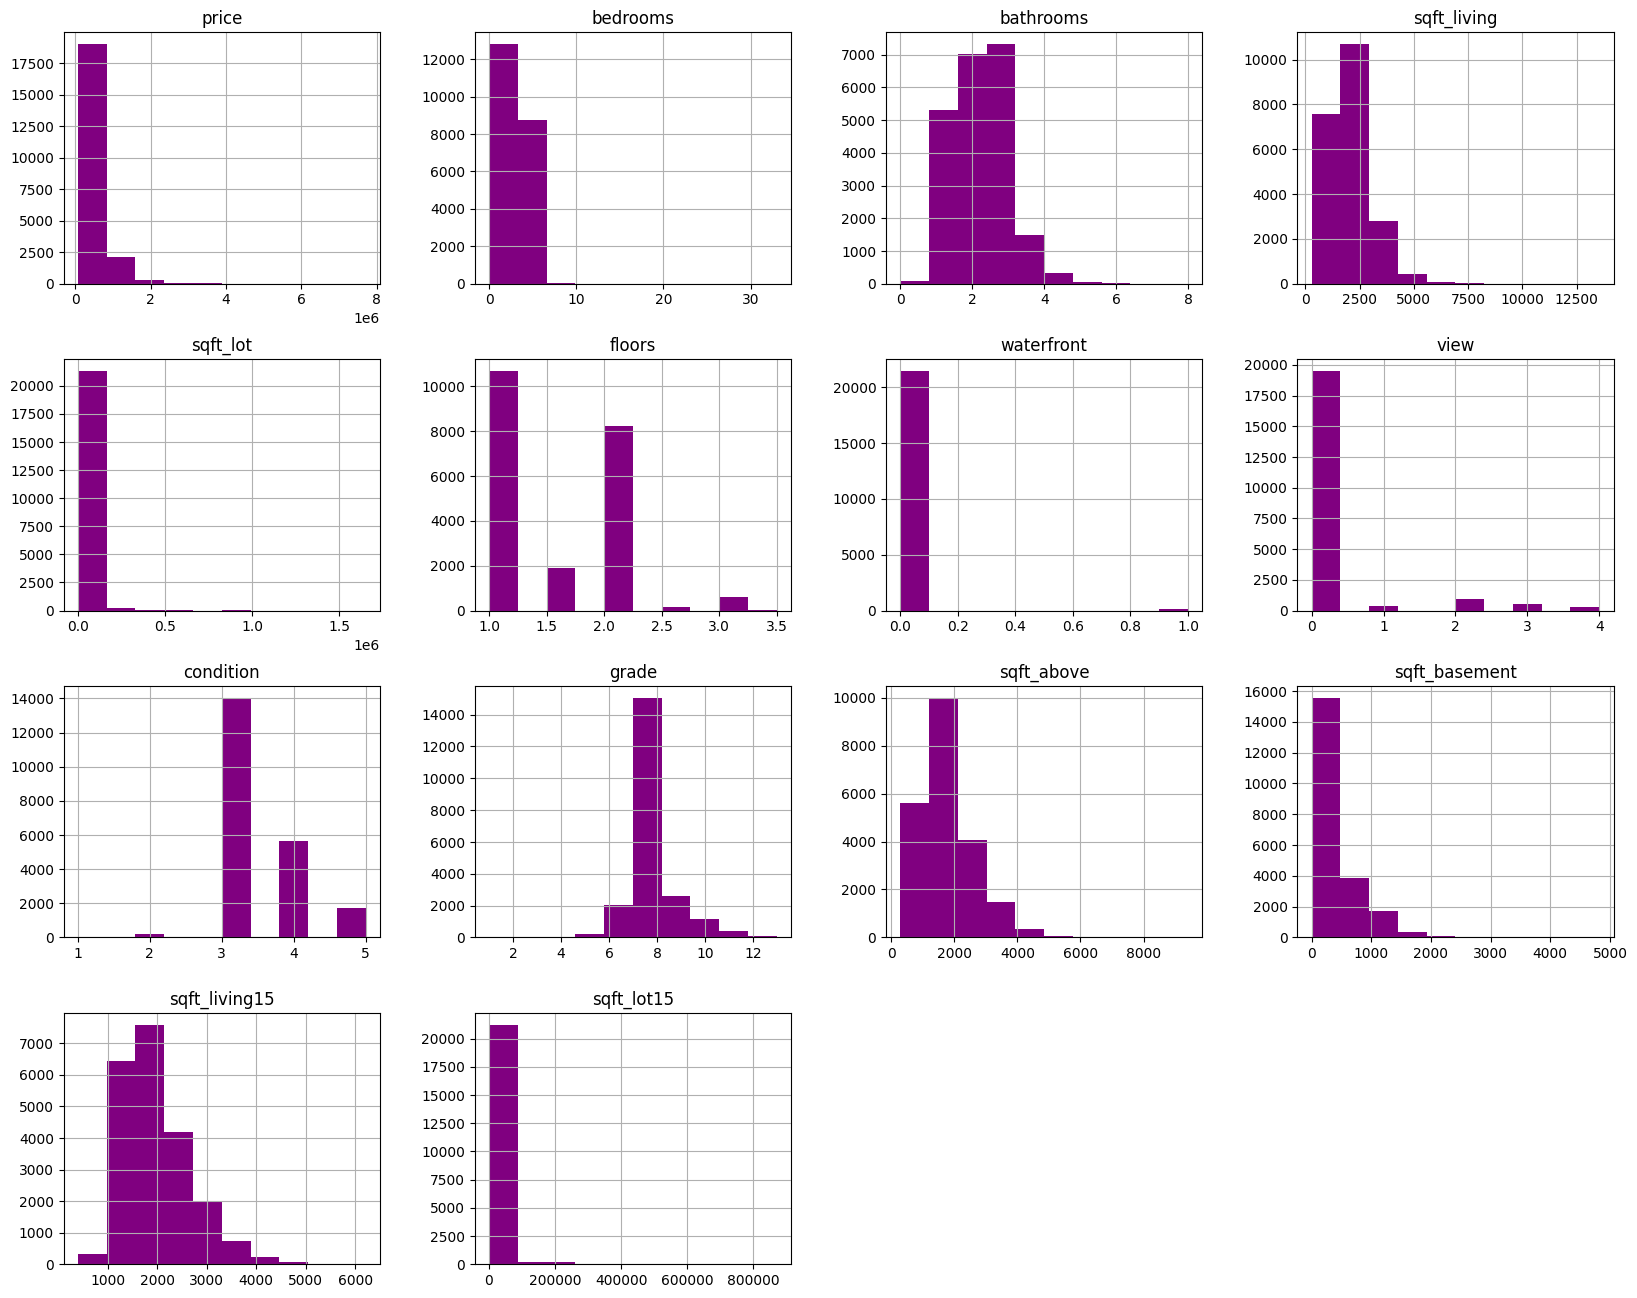

In [31]:
# Hist Plot of data
data.hist(figsize=(20,16), color = "purple")
plt.show()

<AxesSubplot: >

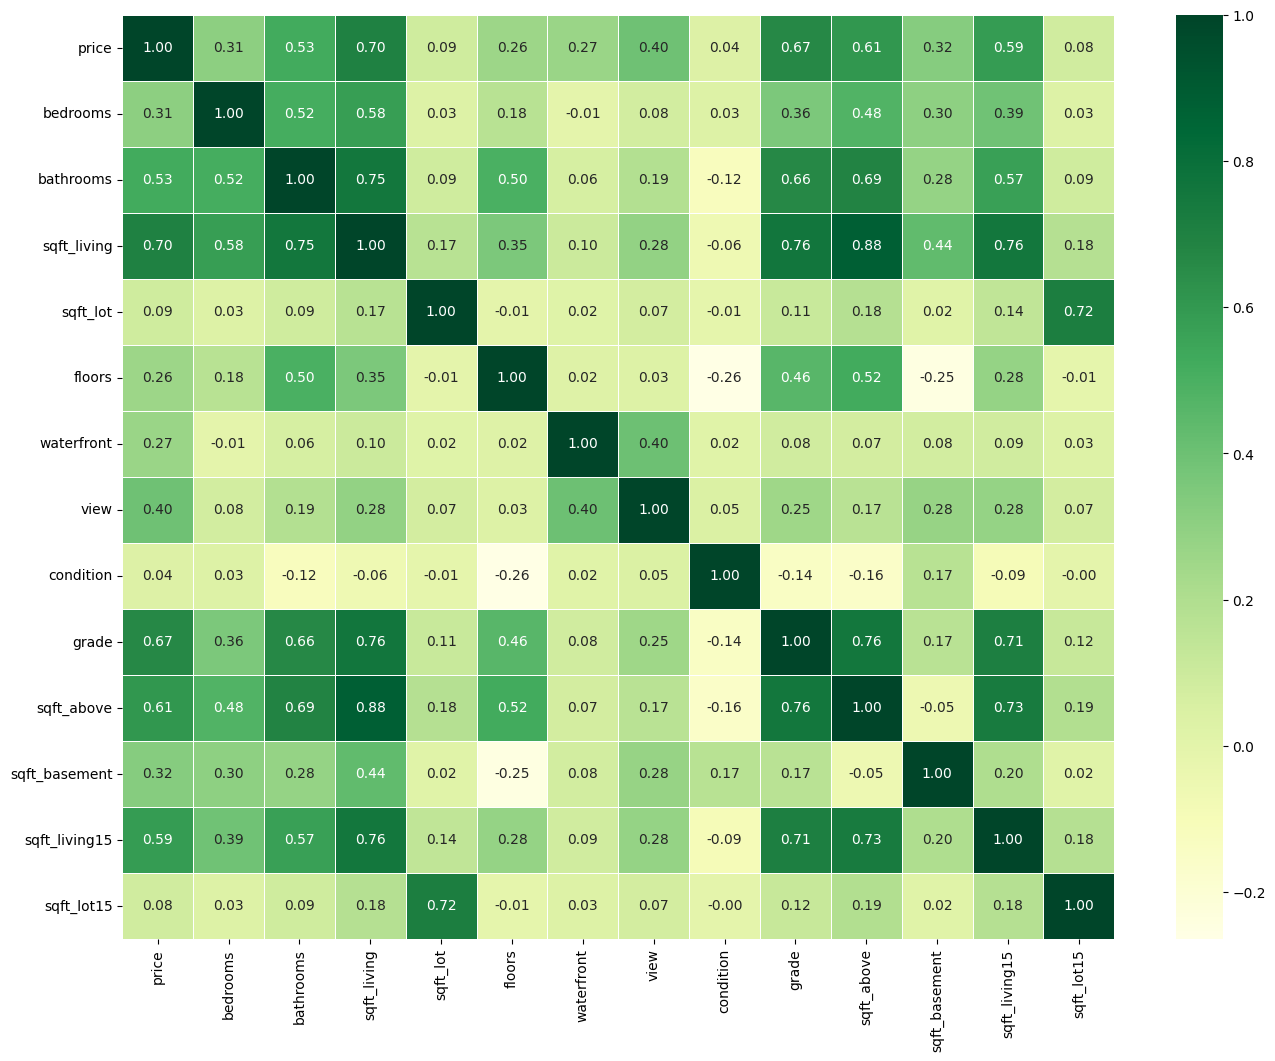

In [32]:
plt.figure(figsize=(16,12))
sns.heatmap(data.corr(), annot=True, cmap="YlGn", linewidths=.5, fmt='.2f', annot_kws={'size':10})

In [33]:
y = data["price"]
y.head()

0    75000.0
1    78000.0
2    80000.0
3    81000.0
4    82000.0
Name: price, dtype: float64

In [34]:
x = data.drop('price', axis = 1)
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,1,0.00,670,43377,1.0,0,0,3,3,670,0,1160,42882
1,2,1.00,780,16344,1.0,0,0,1,5,780,0,1700,10387
2,1,0.75,430,5050,1.0,0,0,2,4,430,0,1200,7500
3,2,1.00,730,9975,1.0,0,0,1,5,730,0,860,9000
4,3,1.00,860,10426,1.0,0,0,3,6,860,0,1140,11250


___Test Train Split and Model Building___

___SUPPORT VECTOR REGRESSOR___

In [35]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,shuffle = True,test_size=0.20)

In [37]:
pipe = Pipeline([('scaler', StandardScaler()), ('svr', SVR(kernel='rbf',C=1.0))])
pipe

Pipeline(steps=[('scaler', StandardScaler()), ('svr', SVR())])

In [38]:
fit = pipe.fit(x_train, y_train)

In [39]:
y_pred = pipe.predict(x_test)
y_pred

array([450589.16875398, 450327.17222986, 450761.90320052, ...,
       450267.29545748, 450312.89868097, 449582.20327915])

In [40]:
# Checking the MSE
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mse

140689001641.01093

In [41]:
# Checking the R2 value
# r2_score = r2_score(y_test, y_pred)
# r2_score

In [43]:
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

375085.32581402187

___RANDOM FOREST REGRESSOR___

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
pipe1 = Pipeline([('scaler', StandardScaler()), ('RFR', RandomForestRegressor(n_estimators=100,criterion='squared_error'))])
pipe1

Pipeline(steps=[('scaler', StandardScaler()), ('RFR', RandomForestRegressor())])

In [36]:
fit1 = pipe1.fit(x_train,y_train)

In [37]:
y_pred1 = pipe1.predict(x_test)
y_pred1

array([349251.  , 394920.2 , 355868.  , ..., 373332.  , 531517.73,
       320194.47])

In [38]:
# Checking the MSE
mse1 = mean_squared_error(y_test, y_pred1)
mse1

37424091784.409454

In [39]:
# Checking the R2 value
r2_score1 = r2_score(y_test,y_pred1)
r2_score1

0.7195682500143947

In [40]:
from math import sqrt
rmse1 = sqrt(mean_squared_error(y_test, y_pred1))
rmse1

193453.07385619247

___DECISION TREES REGRESSOR___

In [41]:
from sklearn.tree import DecisionTreeRegressor

In [42]:
pipe2 = Pipeline([('scaler', StandardScaler()), ('DTR', DecisionTreeRegressor(criterion='squared_error', splitter='best'))])
pipe2

Pipeline(steps=[('scaler', StandardScaler()), ('DTR', DecisionTreeRegressor())])

In [43]:
fit2 = pipe2.fit(x_train,y_train)

In [44]:
y_pred2 = pipe2.predict(x_test)
y_pred2

array([453000., 299000., 480000., ..., 279950., 682000., 240000.])

In [45]:
# Checking the MSE
mse2 = mean_squared_error(y_test, y_pred2)
mse2

77761116686.52042

In [46]:
# Checking the R2 value
r2_score2 = r2_score(y_test,y_pred2)
r2_score2

0.41730887795865657

In [47]:
rmse2 = sqrt(mean_squared_error(y_test, y_pred1))
rmse2

193453.07385619247

___XGBOOST REGRESSOR___

In [48]:
from sklearn.ensemble import GradientBoostingRegressor

In [49]:
pipe3 = Pipeline([('scaler', StandardScaler()), ('XGB', GradientBoostingRegressor(loss='squared_error', learning_rate=0.1,criterion='squared_error'))])
pipe3

Pipeline(steps=[('scaler', StandardScaler()),
                ('XGB', GradientBoostingRegressor(criterion='squared_error'))])

In [50]:
fit3 = pipe3.fit(x_train,y_train)

In [51]:
y_pred3 = pipe3.predict(x_test)
y_pred3

array([386661.99014093, 462823.06276299, 359300.64888863, ...,
       464185.53450083, 482306.82277605, 339442.59861413])

In [52]:
# Checking the MSE
mse3 = mean_squared_error(y_test, y_pred3)
mse3

38982318536.4099

In [53]:
# Checking the R2 value
r2_score3 = r2_score(y_test,y_pred3)
r2_score3

0.7078919144213982

In [54]:
# hecking for RMSE value
rmse3 = sqrt(mean_squared_error(y_test, y_pred3))
rmse3

197439.40472056204

___MULTIPLE LINEAR REGRESSOR___

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
pipe4 = Pipeline([('scaler', StandardScaler()), ('LR', LinearRegression())])
pipe4

Pipeline(steps=[('scaler', StandardScaler()), ('LR', LinearRegression())])

In [57]:
fit4 = pipe4.fit(x_train,y_train)

In [58]:
y_pred4 = pipe4.predict(x_test)
y_pred4

array([495863.24626301, 413725.98886222, 408950.45394186, ...,
       555944.50359783, 389433.94296016, 376881.74460014])

In [59]:
# Checking the MSE
mse4 = mean_squared_error(y_test, y_pred4)
mse4

53263405898.06098

In [60]:
# Checking the R2 value
r2_score4 = r2_score(y_test,y_pred4)
r2_score4

0.6008787544602654

In [61]:
# Checking for RMSE value
rmse4 = sqrt(mean_squared_error(y_test, y_pred4))
rmse4

230788.6606791178

___LGBM REGRESSOR___

In [62]:
from lightgbm import LGBMRegressor

In [63]:
pipe5 = Pipeline([('scaler', StandardScaler()), ('LGBM', LGBMRegressor(boosting_type='gbdt',learning_rate=0.1, n_estimators=100))])
pipe5

Pipeline(steps=[('scaler', StandardScaler()), ('LGBM', LGBMRegressor())])

In [64]:
fit5 = pipe5.fit(x_train,y_train)

In [65]:
y_pred5 = pipe5.predict(x_test)
y_pred5

array([362300.44751144, 432337.78476165, 396669.76490466, ...,
       441843.46716993, 476624.31986884, 320765.78965408])

In [66]:
# Checking the MSE
mse5 = mean_squared_error(y_test, y_pred5)
mse5

38295973056.389244

In [67]:
# Checking the R2 value
r2_score5 = r2_score(y_test,y_pred5)
r2_score5

0.7130349400735821

In [68]:
# Checking for RMSE value
rmse5 = sqrt(mean_squared_error(y_test, y_pred5))
rmse5

195693.56927704407

___SGD REGRESSOR___

In [69]:
from sklearn.linear_model import SGDRegressor

In [70]:
pipe6 = Pipeline([('scaler', StandardScaler()), ('SGD', SGDRegressor(loss='squared_error',penalty='l2', alpha=0.1))])
pipe6

Pipeline(steps=[('scaler', StandardScaler()), ('SGD', SGDRegressor(alpha=0.1))])

In [71]:
fit6 = pipe6.fit(x_train,y_train)

In [72]:
y_pred6 = pipe6.predict(x_test)
y_pred6

array([486008.42966176, 429386.13732866, 436041.82472682, ...,
       544846.25030891, 408204.55628335, 393026.92376748])

In [73]:
# Checking the MSE
mse6 = mean_squared_error(y_test, y_pred6)
mse6

54235884210.57632

In [74]:
# Checking the R2 value
r2_score6 = r2_score(y_test,y_pred6)
r2_score6

0.5935916358690447

In [75]:
# Checking for RMSE value
rmse6 = sqrt(mean_squared_error(y_test, y_pred6))
rmse6

232885.9897258234

___EXTRA TREES REGRESSOR___

In [76]:
from sklearn.ensemble import ExtraTreesRegressor

In [77]:
pipe7 = Pipeline([('scaler', StandardScaler()), ('ETR', ExtraTreesRegressor(n_estimators=100,criterion='squared_error'))])
pipe7

Pipeline(steps=[('scaler', StandardScaler()), ('ETR', ExtraTreesRegressor())])

In [78]:
fit7 = pipe7.fit(x_train,y_train)

In [79]:
y_pred7= pipe7.predict(x_test)
y_pred7

array([339013.  , 378664.2 , 336691.  , ..., 452196.75, 432804.24,
       324300.64])

In [80]:
# Checking the MSE
mse7 = mean_squared_error(y_test, y_pred7)
mse7

43354278091.17433

In [81]:
# Checking the R2 value
r2_score7 = r2_score(y_test,y_pred7)
r2_score7

0.6751312992574616

In [82]:
# Checking for RMSE value
rmse7 = sqrt(mean_squared_error(y_test, y_pred7))
rmse7

208216.9015502208

___BAYESIAN RIDGE REGRESSOR___

In [83]:
from sklearn.linear_model import BayesianRidge

In [84]:
pipe8 = Pipeline([('scaler', StandardScaler()), ('BR', BayesianRidge())])
pipe8

Pipeline(steps=[('scaler', StandardScaler()), ('BR', BayesianRidge())])

In [85]:
fit8 = pipe8.fit(x_train,y_train)

In [86]:
y_pred8 = pipe8.predict(x_test)
y_pred8

array([489993.33443336, 420115.60406402, 417513.3844154 , ...,
       556219.14179879, 390913.99103127, 383933.93371714])

In [87]:
# Checking the MSE
mse8 = mean_squared_error(y_test, y_pred8)
mse8

53354608044.21753

In [88]:
# Checking the R2 value
# r2_score8 = r2_score(y_test,y_pred8)
# r2_score8

In [89]:
# Checking for RMSE value
rmse8 = sqrt(mean_squared_error(y_test, y_pred8))
rmse8

230986.1641835232

___REAL TIME PREDICTION___

In [90]:
import joblib
dump = joblib.dump(pipe1, 'rf_house_price_estimator.pkl')

In [91]:
load = joblib.load('rf_house_price_estimator.pkl')

In [94]:
test = x.head(1)
test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,1,0.0,670,43377,1.0,0,0,3,3,670,0,1160,42882


In [96]:
result = load.predict(test)
result

array([168824.96])

___CONCLUSION___

* In this project Pre-Processing steps follwed are:
    
    1. Exploratory Data Analysis.
    
    2. Standard Scalling.
    
    
* For modelling i have trained nine Regression models to give best out put. 

* Among all the nine models Random Forest Gives best R2 Score and RMSE score, based on these scores i've selected Random forest regressor for Deployment.

* R2 and RMSE values of Random forest regressor are 0.719 and 193453.0739